<a href="https://colab.research.google.com/github/gabrielterceiro/SuperstoreSales/blob/main/Superstore_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xlrd -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [18]:
file_path = 'https://github.com/gabrielterceiro/SuperstoreSales/blob/main/Sample%20-%20Superstore.xls?raw=true'

In [19]:
df = pd.read_excel(file_path) #read excel dataset from github url

In [5]:
top_customers = df['Customer Name'].value_counts()[:10] #makes a series from the 10 most recurring names

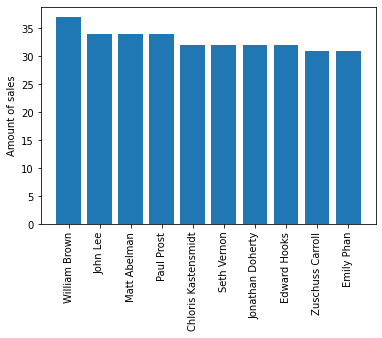

In [59]:
#plot a graph showing the 10 most recurring customers and how many times the bought
plt.bar(top_customers.index.to_list(), top_customers.to_list())
plt.xticks(rotation=90)
plt.ylabel('Amount of sales')
plt.show()

In [43]:
biggest_customers = df['Sales'].groupby(df['Customer Name']).sum()

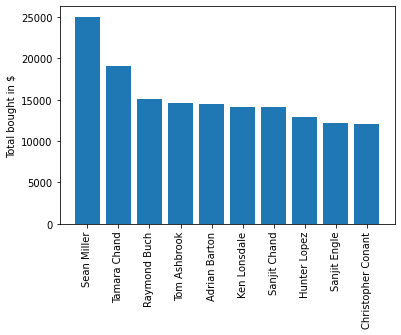

In [60]:
#plot a graph showing the 10 biggest customers
plt.bar(biggest_customers.nlargest(10, keep = 'all').index.to_list(), biggest_customers.nlargest(10, keep = 'all').to_list())
plt.xticks(rotation = 90)
plt.ylabel('Total bought in $')
plt.show()

In [46]:
#create a new colum with YYYY-mm format of Order Date
df['Date Month'] = df['Order Date'].dt.strftime('%Y-%m') 

In [49]:
#sum sales by month
sales_month = df.groupby(['Date Month'], as_index=False)['Sales'].sum()

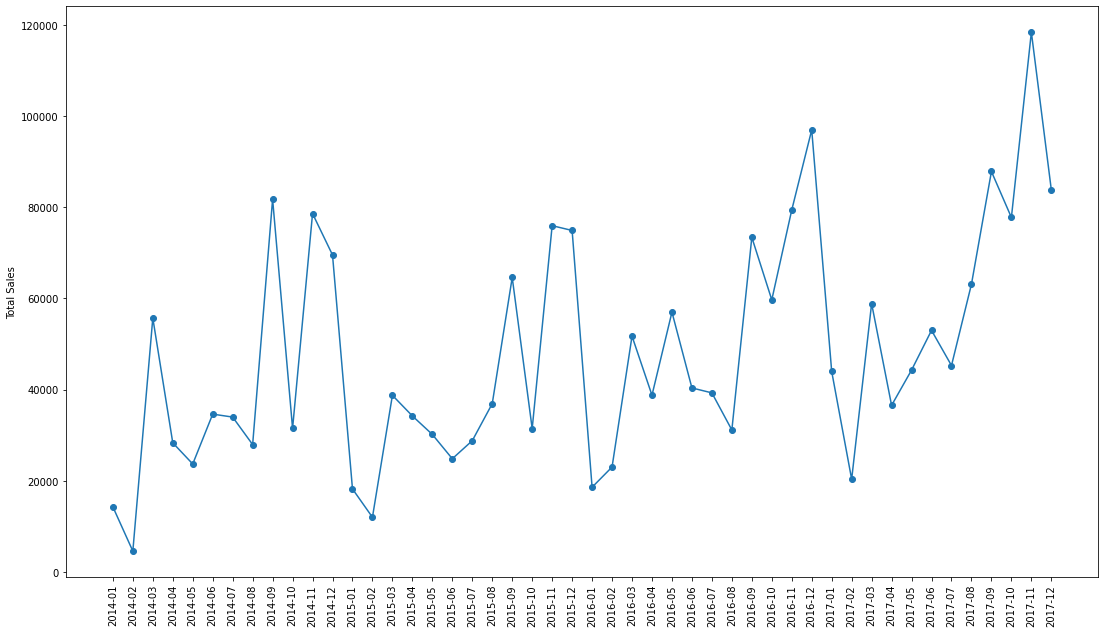

In [63]:
fig, ax = plt.subplots()
ax.plot (sales_month['Date Month'], sales_month['Sales'], linestyle = '-', marker = 'o')
plt.xticks(rotation=90)
fig.set_size_inches(18.5, 10.5)
plt.ylabel('Total Sales')
plt.show()